In [1]:
# Reading Data 
import pandas as pd 
from sklearn.datasets import load_iris

# Preprocessing 
from sklearn.model_selection import train_test_split

# Models 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor

# Model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

# Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Display
from IPython.display import display

# Reading the data 

In [2]:
data = pd.read_csv('../data/kc_house_data.csv')

In [3]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = data[features]
y = data['price']

# Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Regression 

In [5]:
# creating and training the random forest regressor 
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
train_pred_random_forest_reg = random_forest_reg.predict(X_train)
test_pred_random_forest_reg = random_forest_reg.predict(X_test)

print(f'The R squared score for train set of random forest regressor is {random_forest_reg.score(X_train, y_train)}')
print(f'The R squared score for test set of random forest regressor is {random_forest_reg.score(X_test, y_test)}')

The R squared score for train set of random forest regressor is 0.9395359644802134
The R squared score for test set of random forest regressor is 0.5027403276382976


# Classification 

In [7]:
iris = load_iris()
X = iris.data
y = iris.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

# Random Forest Classifier 

In [9]:
# Creating and training the random forest classifier 
clf_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
clf_random_forest.fit(X_train, y_train)

# Creating and training a bagging tree classifier 
clf_bagging_tree = BaggingClassifier(n_estimators=100, random_state=42)
clf_bagging_tree.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [10]:
pred_train_rf = clf_random_forest.predict(X_train)
pred_test_rf = clf_random_forest.predict(X_test)

pred_train_btc = clf_bagging_tree.predict(X_train)
pred_test_btc =  clf_bagging_tree.predict(X_test)

In [11]:
print('Classification report of Random Forest Classifier on train set')
print(classification_report(y_true=y_train, y_pred=pred_train_rf))

print('Classification report of Bagging Tree Classifier on train set')
print(classification_report(y_true=y_train, y_pred=pred_train_btc))


print('Classification report of Random Forest Classifier on test set')
print(classification_report(y_true=y_test, y_pred=pred_test_rf))

print('Classification report of Bagging Tree Classifier on test set')
print(classification_report(y_true=y_test, y_pred=pred_test_btc))

Classification report of Random Forest Classifier on train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Classification report of Bagging Tree Classifier on train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Classification report of Random Forest Classifier on test set
              precision    recall  f1-score   suppo

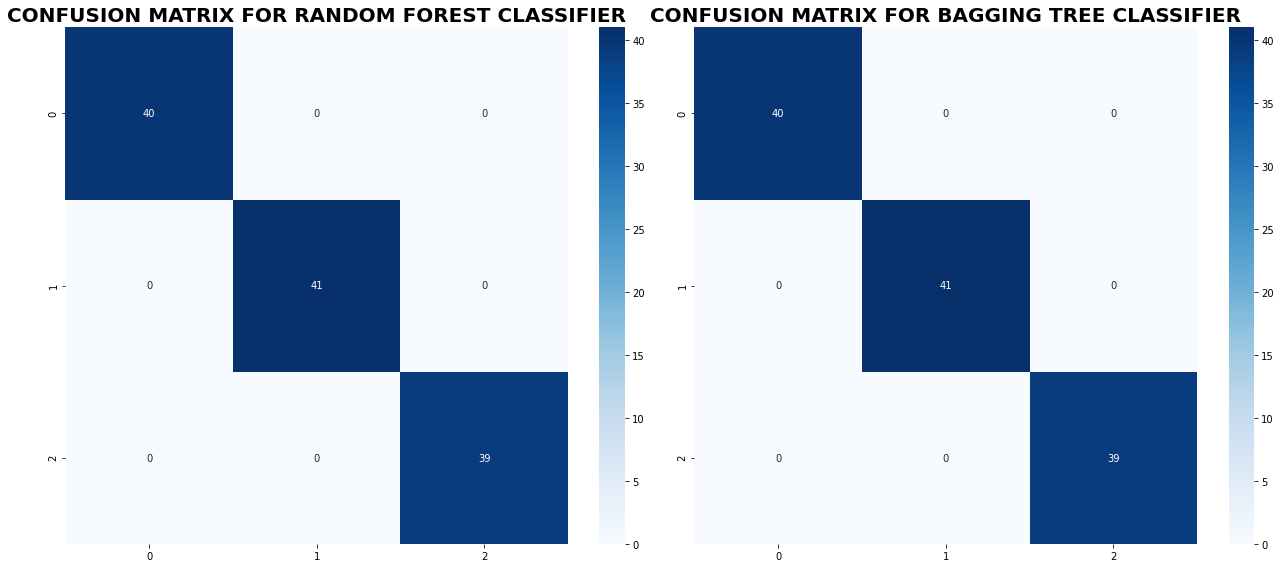

In [12]:
fig, ax = plt.subplots(figsize=(18,8),nrows=1, ncols=2)
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=pred_train_rf),ax=ax[0],annot=True, cmap='Blues',fmt='g')
ax[0].set_title('CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER',fontsize=20, fontweight='bold')
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=pred_train_btc),ax=ax[1],cmap='Blues',annot=True,fmt='g')
ax[1].set_title('CONFUSION MATRIX FOR BAGGING TREE CLASSIFIER',fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [13]:
# Feature importances for Random Forest Classifier 
print('Feature Importances for Random Forest Classifier')
importances_rfc = pd.DataFrame({'Features':iris.feature_names, 'Importances':clf_random_forest.feature_importances_})
importances_rfc.sort_values(ascending=False,by='Importances', inplace=True)
display(importances_rfc)

Feature Importances for Random Forest Classifier


,Features,Importances
2,petal length (cm),0.439994
3,petal width (cm),0.421522
0,sepal length (cm),0.108098
1,sepal width (cm),0.030387
